In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

# read spec data
z = 0.0307
spec = '../spectroscopy/ZTF20aayhacx_20200528_P60_v2.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

# 20200528_P60

## Si II 6355

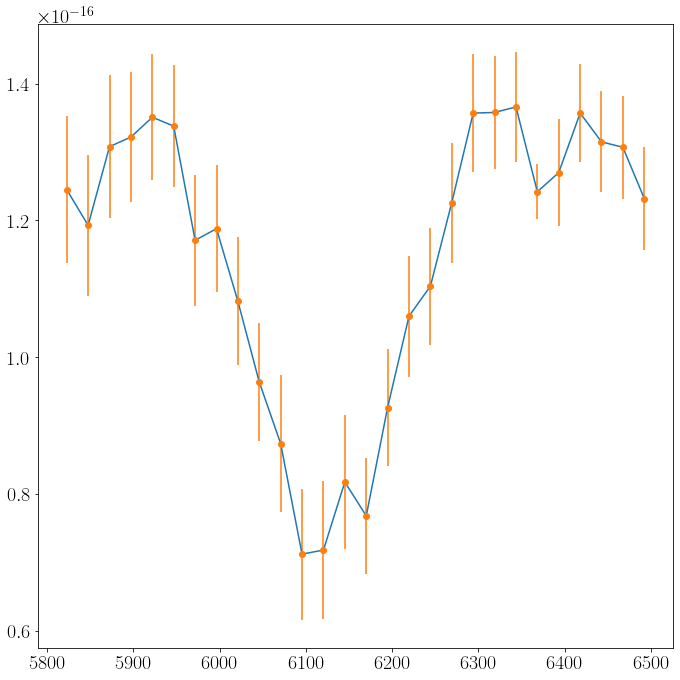

In [3]:
Spec1.plot_line_region(5800, 6500)

In [4]:
Spec1.add_line('SiII_6355', 5950, 6400, lines=[6371.359, 6347.103])

18 points within 5950.00 and 6400.00 angstroms.


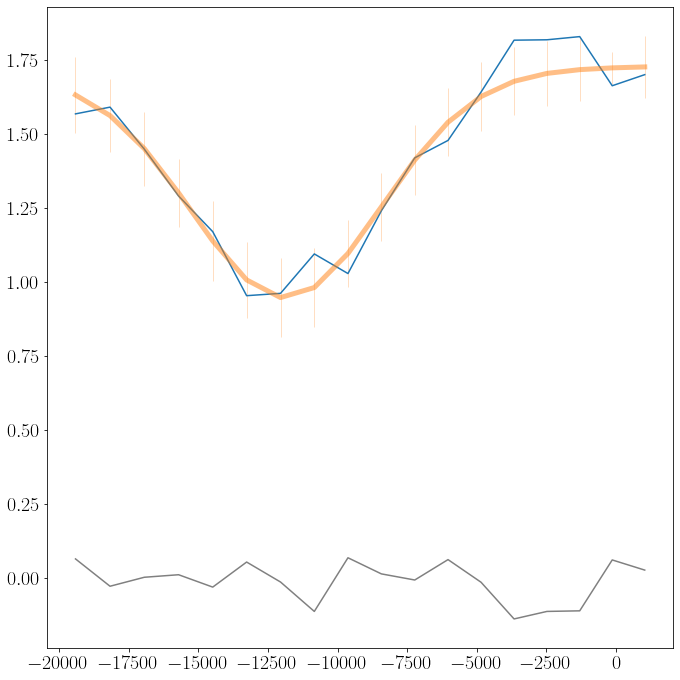

[ 1.72787928e+00  1.69537900e+00 -1.12794227e+04  1.62366702e+01
 -3.25100601e+03]


In [5]:
Spec1.line['SiII_6355'].LS_estimator()

100%|██████████| 1500/1500 [00:16<00:00, 92.54it/s] 


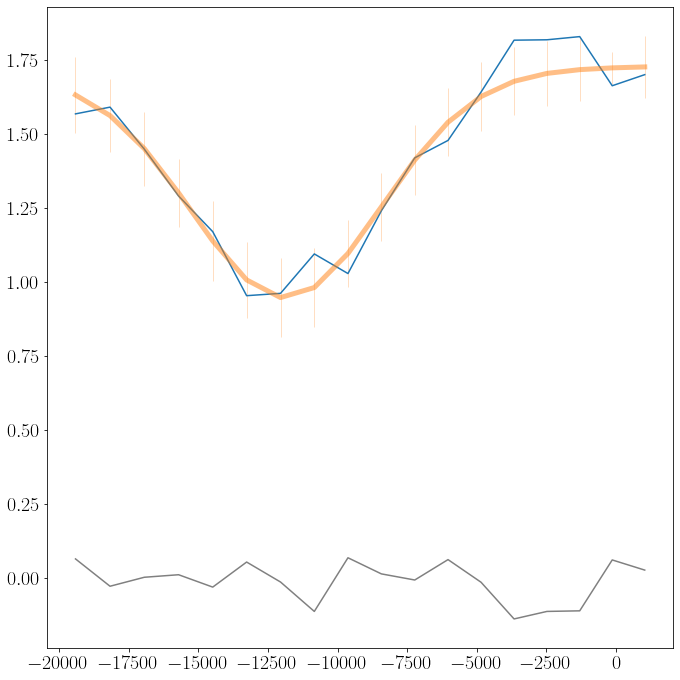

Velocity pvf: -11369 pm 377 km/s


In [6]:
sampler = Spec1.line['SiII_6355'].MCMC_sampler()

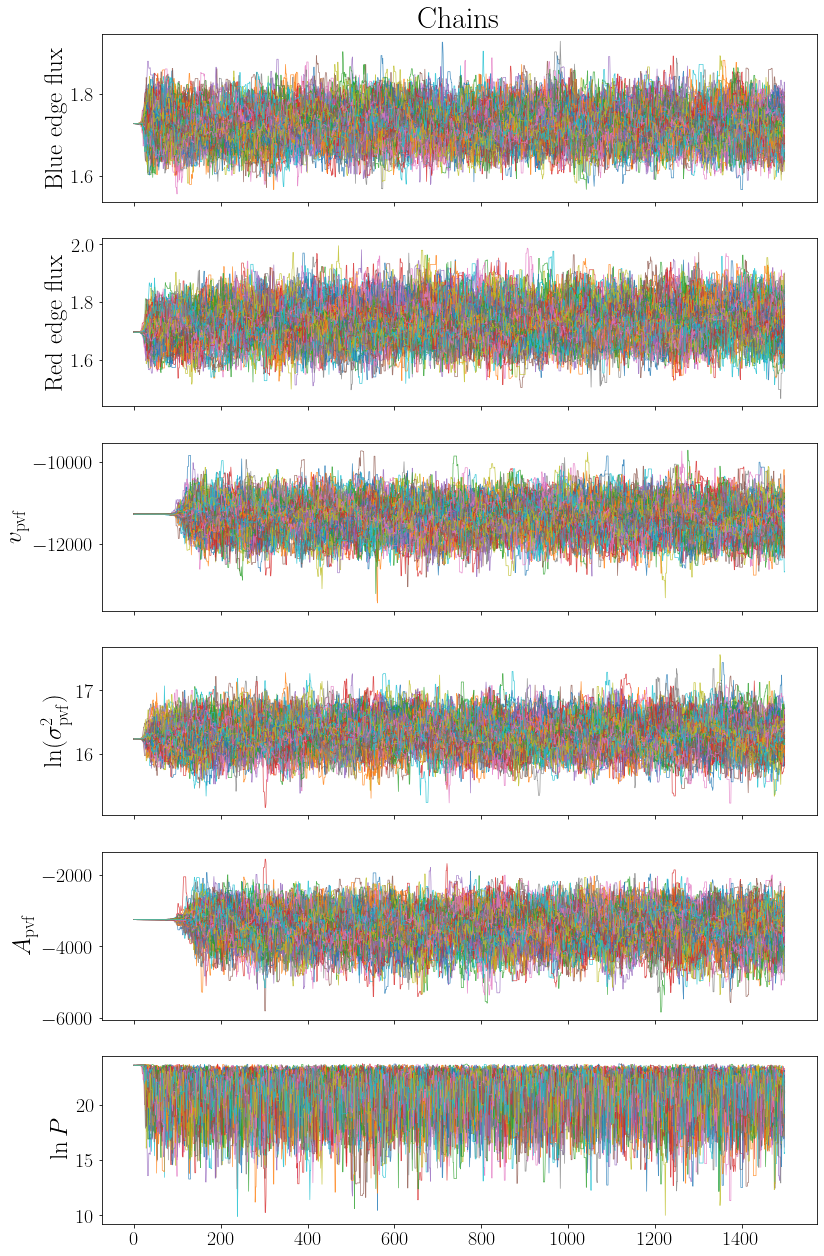

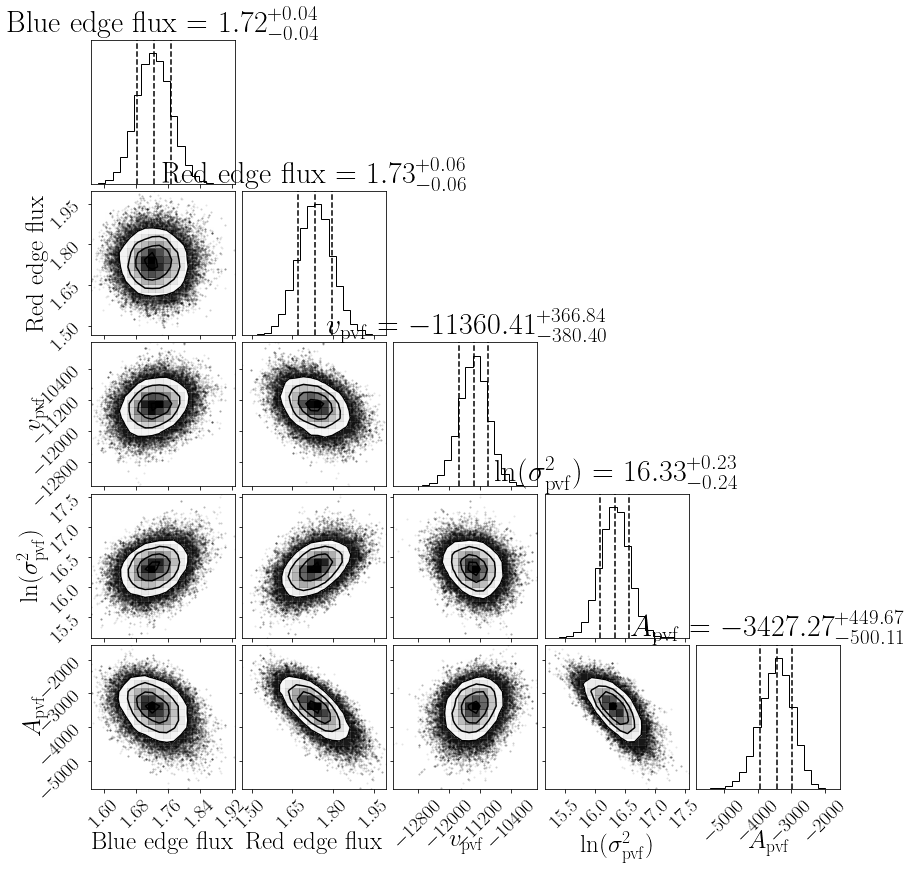

In [8]:
vel.plot_MCMC(sampler, 200)

## Ca II IRT

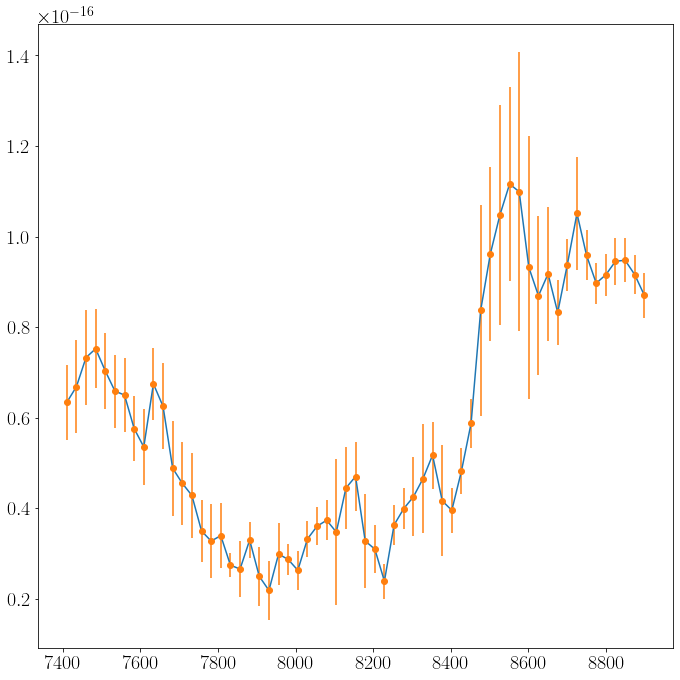

In [7]:
Spec1.plot_line_region(7400, 8900)

In [16]:
Spec1.add_line('CaII_IRT', 7600, 8700, lines=[8498.018, 8542.089, 8662.140])

44 points within 7600.00 and 8700.00 angstroms.


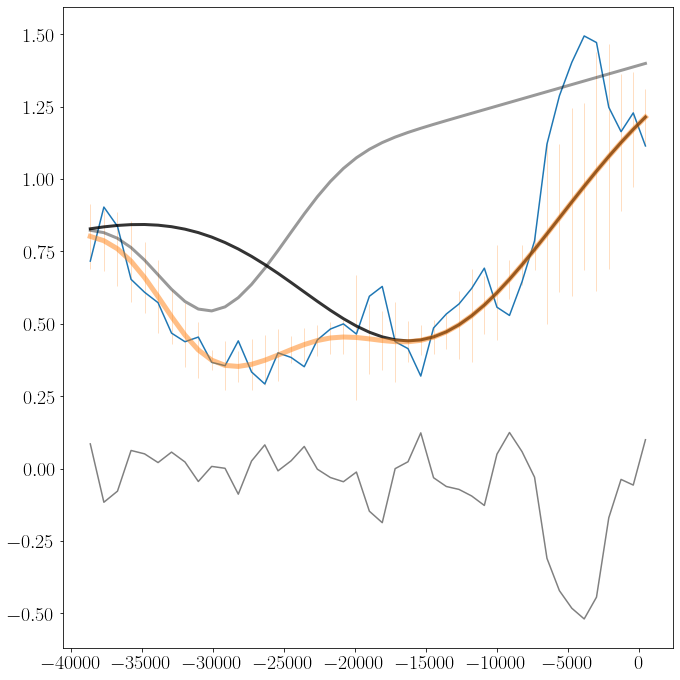

[ 1.41137338e+00  8.44601585e-01 -1.12776123e+04  1.81482769e+01
 -5.56629268e+03 -2.58516470e+04  1.62329872e+01 -1.51623004e+03]


In [17]:
Spec1.line['CaII_IRT'].LS_estimator(guess=(1, 1, -10000, 15, -1000, -25000, 15, -1000))

100%|██████████| 2000/2000 [00:36<00:00, 55.33it/s]


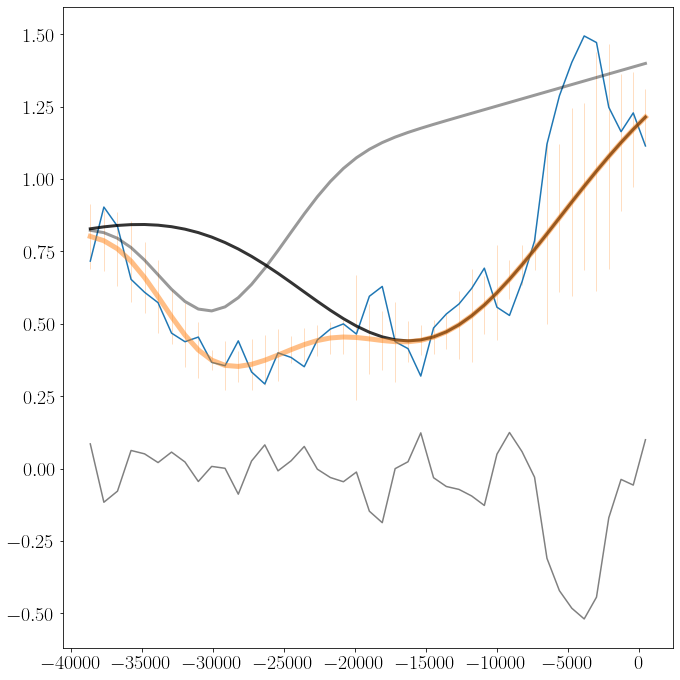

Velocity pvf: -11172 pm 405 km/s
Velocity hvf: -26084 pm 786 km/s


In [19]:
mu_pvf_prior = Spec1.line['SiII_6355'].theta_MCMC[2]
var_pvf_prior = Spec1.line['SiII_6355'].sig_theta_MCMC[2]**2
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(mu_pvf=mu_pvf_prior,
                                              var_pvf=var_pvf_prior,
                                              nburn=800, nsteps=2000)

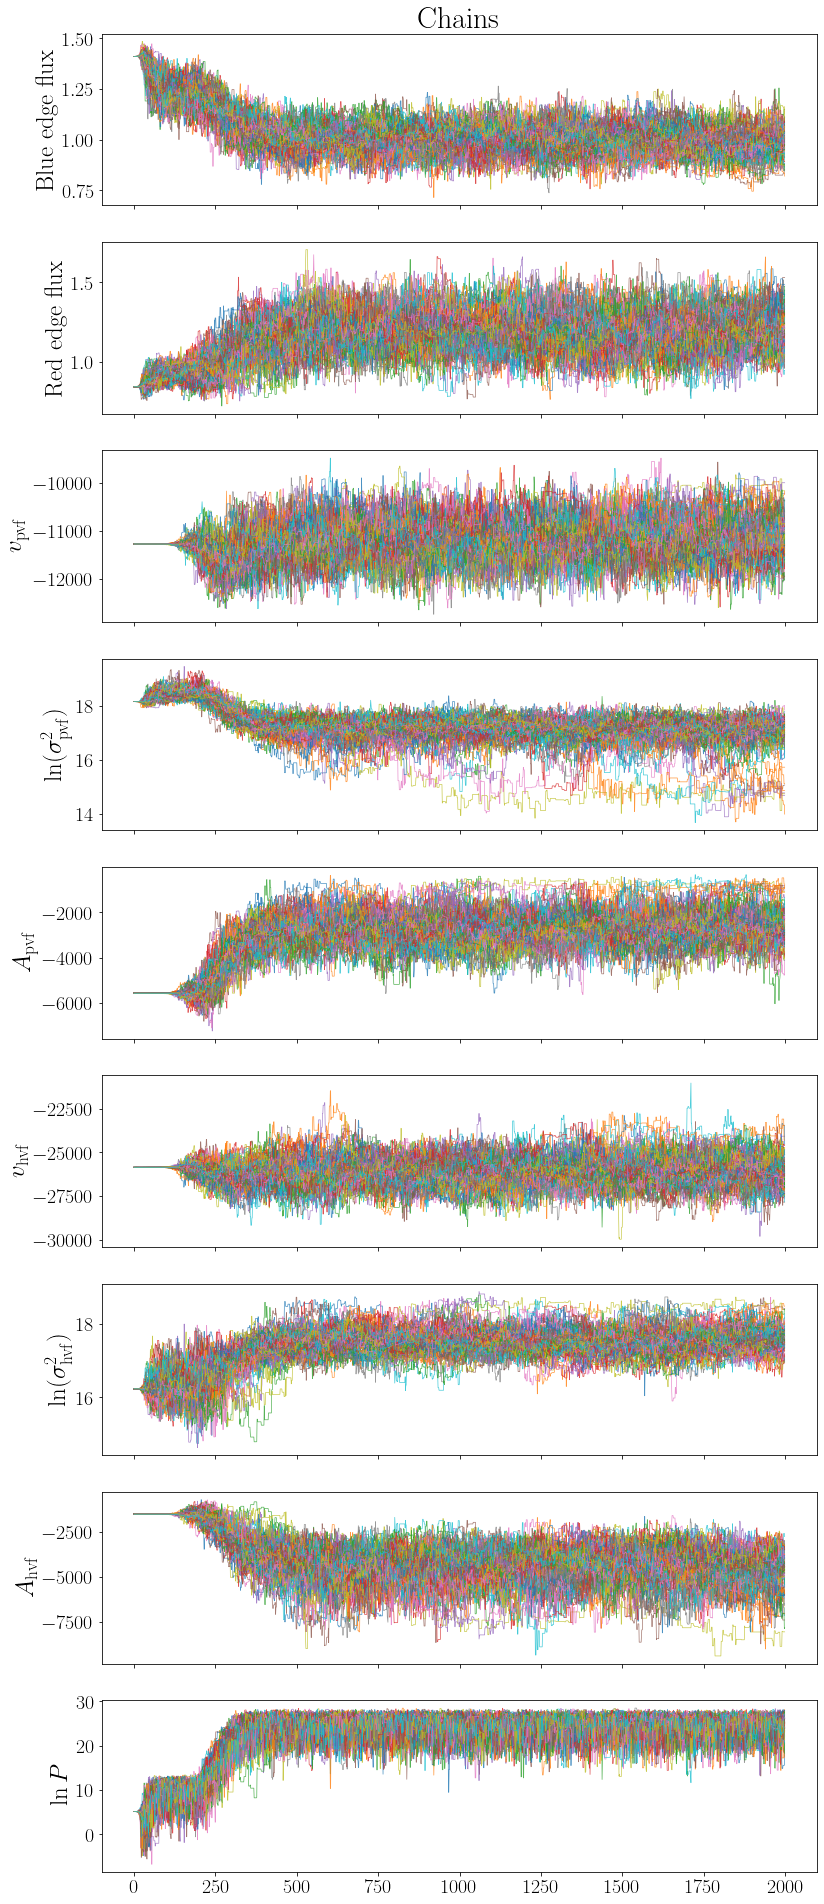

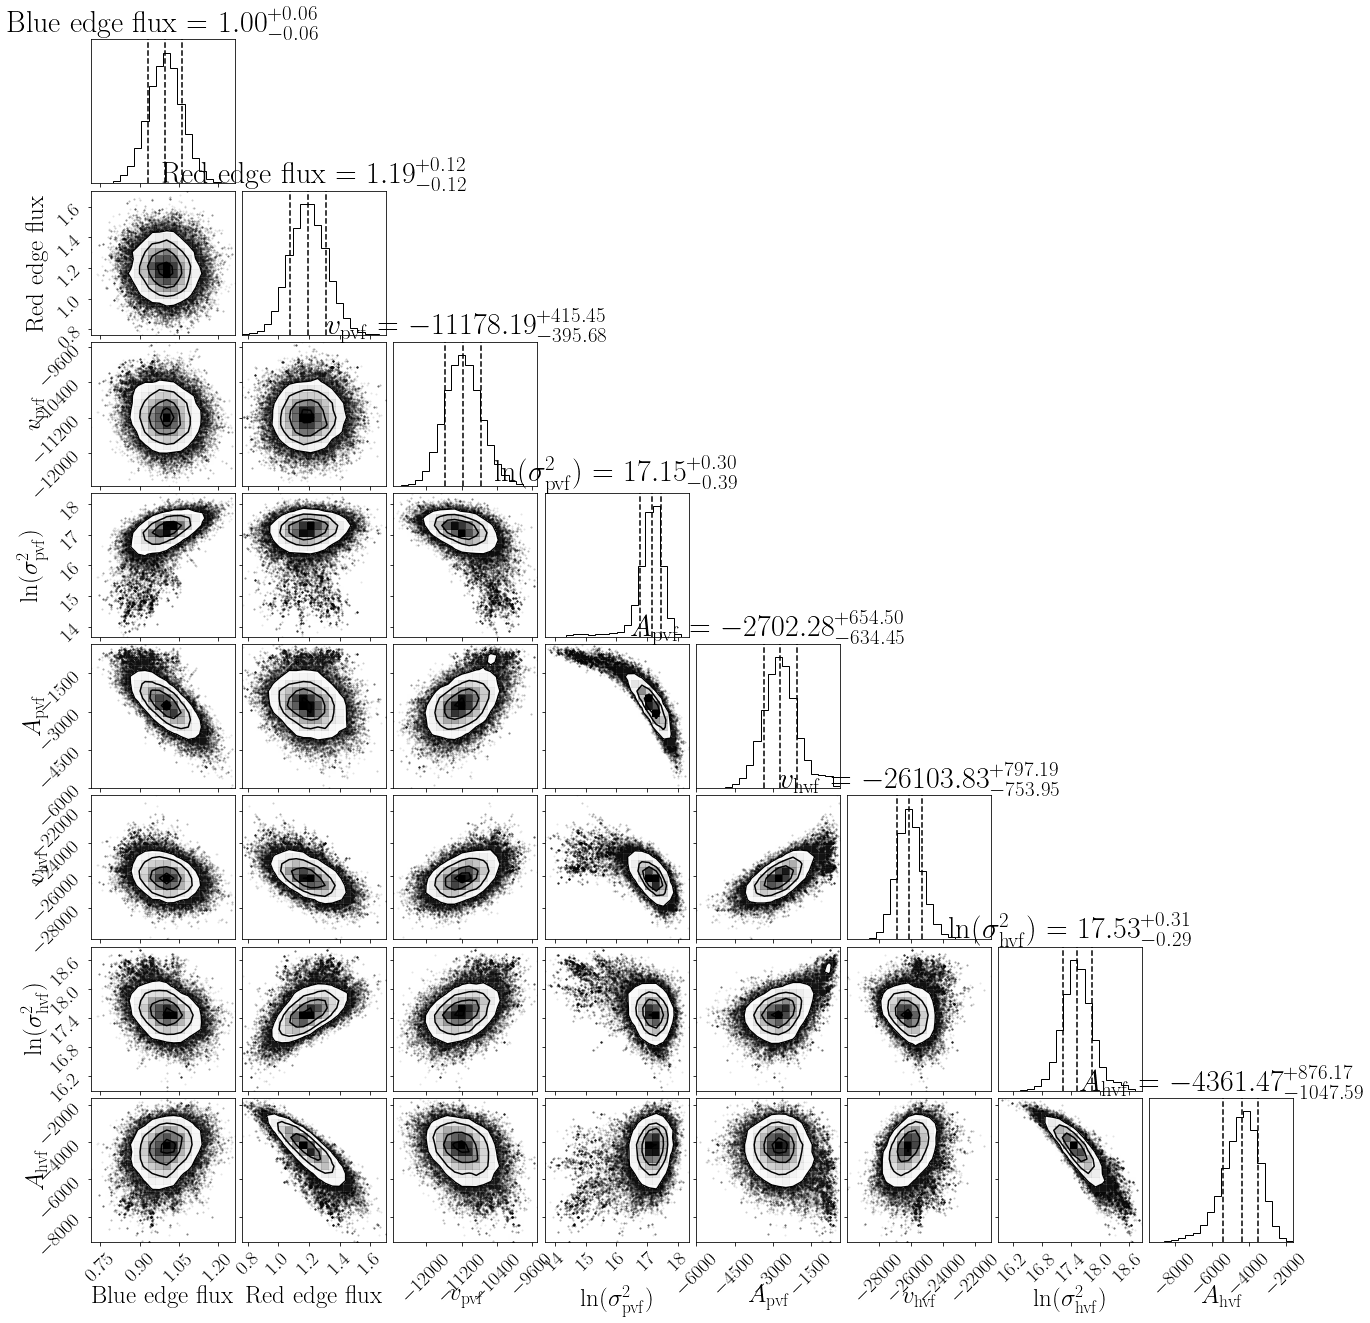

In [20]:
vel.plot_MCMC(sampler, 500)